### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure.  


In [157]:
import requests
from bs4 import BeautifulSoup
from pprint import pprint

#sending requests for benguerir and tangier 
url = 'https://weather.com/weather/tenday/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111'
url1 = 'https://weather.com/weather/tenday/l/701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c'

data = requests.get(url).text
soup = BeautifulSoup(data, 'lxml')

data1 = requests.get(url1).text
soup1 = BeautifulSoup(data1, 'lxml')

In [153]:
#here i just srap the 10 days that we want for Benguerir city
day = [day.get_text() for day in soup.find_all("h3", class_='DetailsSummary--daypartName--kbngc')[0:10]]
temperature_night =[temp.get_text() for temp in soup.find_all("span", class_="DetailsSummary--lowTempValue--2tesQ")[0:10]]
temperature_day = [temp.get_text() for temp in soup.find_all('span', class_="DetailsSummary--highTempValue--3PjlX")[0:10]]
weather = [weather.get_text() for weather in soup.find_all('span', class_='DetailsSummary--extendedData--307Ax')[0:10]]
wind = [wind.get_text() for wind in soup.find_all("span", class_="Wind--windWrapper--3Ly7c DailyContent--value--1Jers")[0:10]]
rain = [rain.get_text() for rain in soup.find_all(attrs={"class" : "DailyContent--value--1Jers","data-testid" : "PercentageValue"})[0:10]]
uv_index = [uv.get_text() for uv in soup.find_all(attrs= {"class" : "DetailsTable--value--2YD0-", "data-testid":"UVIndexValue"})[0:10]]
moonrisetime = [moonrise.get_text() for moonrise in soup.find_all(attrs= {"class" : "DetailsTable--value--2YD0-", "data-testid":"MoonriseTime"})[0:10]]
moonset =[moonset.get_text() for moonset in soup.find_all(attrs= {"class": "DetailsTable--value--2YD0-", "data-testid":"MoonsetTime"})[0:10]]


In [169]:
# the same process for tangier city
day1 = [day.get_text() for day in soup1.find_all(attrs={'class':"DetailsSummary--daypartName--kbngc"})[0:10]]
temperature_day1 =[temp.get_text() for temp in soup1.find_all("span", "DetailsSummary--highTempValue--3PjlX")[0:10]]
temperature_night1 = [temp.get_text() for temp in soup1.find_all('span', class_="DetailsSummary--lowTempValue--2tesQ")[0:10]]
weather1 = [weather.get_text() for weather in soup1.find_all('span', class_="DetailsSummary--extendedData--307Ax")[0:10]]
wind1 = [wind.get_text() for wind in soup1.find_all("span", class_="Wind--windWrapper--3Ly7c DailyContent--value--1Jers")[0:10]]
rain1 = [rain.get_text() for rain in soup1.find_all(attrs={"class" : "DailyContent--value--1Jers","data-testid" : "PercentageValue"})[0:10]]
uv_index1 = [uv.get_text() for uv in soup1.find_all(attrs= {"class" : "DetailsTable--value--2YD0-", "data-testid":"UVIndexValue"})[0:10]]
moonrisetime1 = [moonrise.get_text() for moonrise in soup1.find_all(attrs= {"class" : "DetailsTable--value--2YD0-", "data-testid":"MoonriseTime"})[0:10]]
moonset1 =[moonset.get_text() for moonset in soup1.find_all(attrs= {"class": "DetailsTable--value--2YD0-", "data-testid":"MoonsetTime"})[0:10]]


In [170]:
#generate the data we want using pandas 
import pandas as pd
list_name = ['day', 'temperature_night', 'temperature_day','weather', 'wind', 'rain', 'uv_index', 
            'moonrisetime','moonset' ]

meteo_benguerir = pd.DataFrame (list(zip(day, temperature_night, temperature_day,weather, wind, rain, uv_index, 
            moonrisetime,moonset)), columns = list_name)

meteo_tangier = pd.DataFrame (list(zip(day1, temperature_night1, temperature_day1,weather1, wind1, rain1, uv_index1, 
            moonrisetime1,moonset1)), columns = list_name)

In [155]:
meteo_benguerir

,day,temperature_night,temperature_day,weather,wind,rain,uv_index,moonrisetime,moonset
0,Today,46°,65°,AM Clouds/PM Sun,E 8 mph,12%,3 of 10,2:00 am,2:22 pm
1,Sun 18,46°,72°,Partly Cloudy,NE 6 mph,15%,0 of 10,2:58 am,2:50 pm
2,Mon 19,45°,73°,Mostly Sunny,ESE 7 mph,15%,3 of 10,4:00 am,3:20 pm
3,Tue 20,45°,73°,Partly Cloudy,E 5 mph,8%,0 of 10,5:05 am,3:56 pm
4,Wed 21,44°,71°,Mostly Sunny,E 7 mph,8%,3 of 10,6:15 am,4:39 pm
5,Thu 22,43°,70°,Sunny,E 5 mph,7%,0 of 10,7:28 am,5:30 pm
6,Fri 23,43°,71°,Sunny,SSW 8 mph,7%,3 of 10,8:40 am,6:33 pm
7,Sat 24,44°,70°,Mostly Sunny,NE 6 mph,7%,0 of 10,9:46 am,7:43 pm
8,Sun 25,46°,69°,Mostly Sunny,ENE 8 mph,7%,3 of 10,10:44 am,8:58 pm
9,Mon 26,46°,66°,Partly Cloudy,NE 7 mph,10%,0 of 10,11:31 am,10:12 pm


In [171]:
meteo_tangier

,day,temperature_night,temperature_day,weather,wind,rain,uv_index,moonrisetime,moonset
0,Today,54°,66°,Partly Cloudy,WSW 6 mph,7%,2 of 10,1:50 am,2:13 pm
1,Sun 18,58°,69°,Partly Cloudy,E 3 mph,14%,0 of 10,2:51 am,2:38 pm
2,Mon 19,56°,70°,Mostly Sunny,E 14 mph,14%,2 of 10,3:55 am,3:07 pm
3,Tue 20,60°,70°,PM Showers,E 12 mph,12%,0 of 10,5:02 am,3:40 pm
4,Wed 21,56°,67°,Partly Cloudy,E 11 mph,12%,2 of 10,6:15 am,4:20 pm
5,Thu 22,53°,66°,Partly Cloudy,E 7 mph,12%,0 of 10,7:29 am,5:10 pm
6,Fri 23,54°,66°,Partly Cloudy,SE 9 mph,47%,2 of 10,8:43 am,6:12 pm
7,Sat 24,55°,67°,Sunny,SSW 9 mph,85%,0 of 10,9:49 am,7:23 pm
8,Sun 25,56°,67°,Partly Cloudy,SW 6 mph,17%,2 of 10,10:46 am,8:39 pm
9,Mon 26,57°,67°,Showers,N 3 mph,12%,0 of 10,11:31 am,9:55 pm


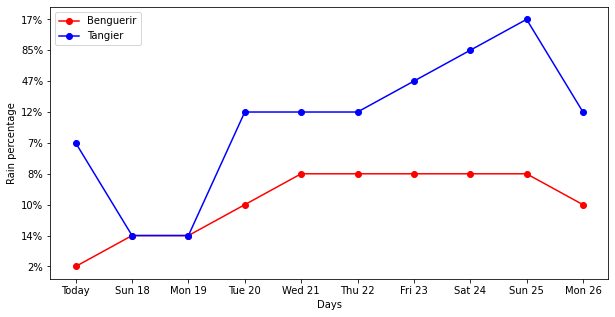

In [179]:
# plot the raining days of the two cities in the same figure.
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(meteo_benguerir["day"],meteo_benguerir["rain"],linestyle='-',marker = 'o',c='r',label="Benguerir")
plt.plot(meteo_tangier["day"],meteo_tangier["rain"],linestyle='-',marker = 'o',c='b',label="Tangier")
plt.ylabel("Rain percentage")
plt.xlabel("Days")
plt.legend()
plt.show()